In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [3]:
etth1 = pd.read_csv(DATA_DIR + 'ETT-small/ETTh1.csv', index_col=0)

In [4]:
etth1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


<Axes: xlabel='date'>

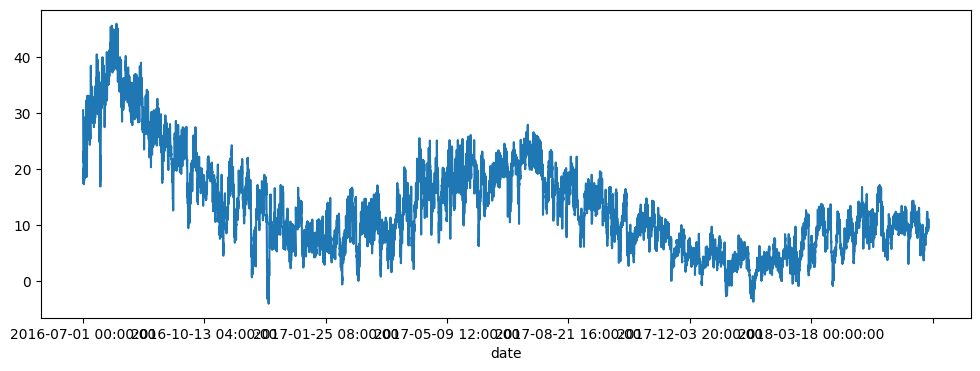

In [5]:
plt.figure(figsize=(12,4))
etth1['OT'].plot()

In [6]:
scaler = MinMaxScaler()
timeseries = etth1['OT']
scaled_etth1 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

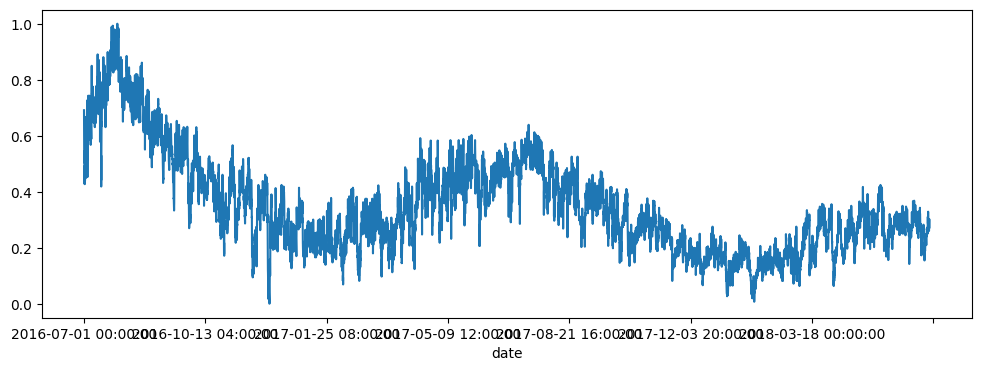

In [7]:
scaled_etth1 = pd.Series(scaled_etth1.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth1.plot()

In [8]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.1773108822
Epoch 2, Boundaries delta: 0.0701775435, Codewords delta: 0.0519965353
Epoch 3, Boundaries delta: 0.0476678573, Codewords delta: 0.0390761473
Epoch 4, Boundaries delta: 0.0354671431, Codewords delta: 0.0282739523
Epoch 5, Boundaries delta: 0.0253435061, Codewords delta: 0.0209077428
Epoch 6, Boundaries delta: 0.0186177327, Codewords delta: 0.0161916153
Epoch 7, Boundaries delta: 0.0144996207, Codewords delta: 0.0129053468
Epoch 8, Boundaries delta: 0.0115488880, Codewords delta: 0.0104258344
Epoch 9, Boundaries delta: 0.0095612917, Codewords delta: 0.0087004499
Epoch 10, Boundaries delta: 0.0081789156, Codewords delta: 0.0075057720
Epoch 11, Boundaries delta: 0.0072646847, Codewords delta: 0.0066026499
Epoch 12, Boundaries delta: 0.0064977613, Codewords delta: 0.0058473123
Epoch 13, Boundaries delta: 0.0058442955, Codewords delta: 0.0052839083
Epoch 14, Boundaries delta: 0.0052847236, Codewords delta: 0.0048428459
E

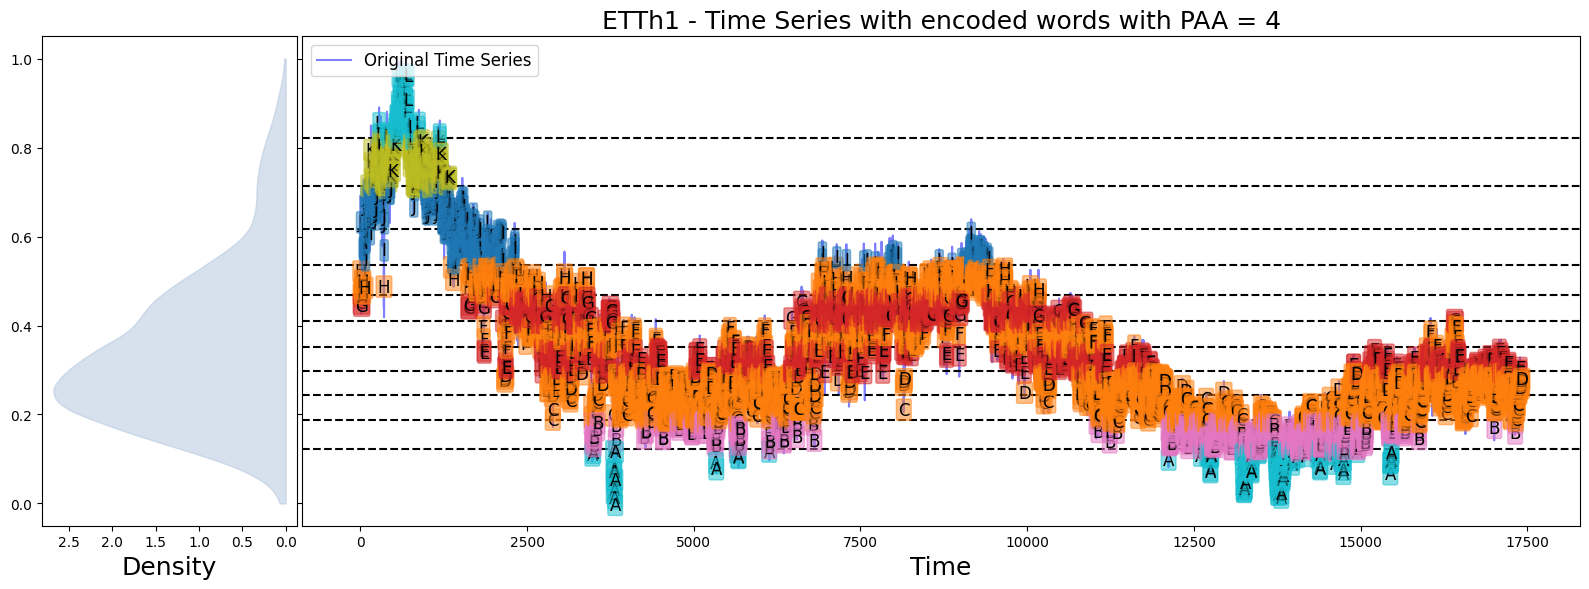

In [18]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth1.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh1_ksax.png", data_name='ETTh1')
# kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh1_ksax.csv")

### Stationary

In [10]:
target = etth1['OT']
target = target.diff().dropna()

In [11]:
target.head()

date
2016-07-01 01:00:00   -2.743999
2016-07-01 02:00:00    0.000000
2016-07-01 03:00:00   -2.743000
2016-07-01 04:00:00   -3.096001
2016-07-01 05:00:00   -0.774000
Name: OT, dtype: float64

Epoch 1, Boundaries delta: 3.4933301496, Codewords delta: 3.5931906064
Epoch 2, Boundaries delta: 1.4058054684, Codewords delta: 0.6466790505
Epoch 3, Boundaries delta: 0.6802345973, Codewords delta: 0.4283098166
Epoch 4, Boundaries delta: 0.4394041824, Codewords delta: 0.3014523321
Epoch 5, Boundaries delta: 0.2976934208, Codewords delta: 0.2198962860
Epoch 6, Boundaries delta: 0.2089034444, Codewords delta: 0.1708120612
Epoch 7, Boundaries delta: 0.1572172055, Codewords delta: 0.1376966006
Epoch 8, Boundaries delta: 0.1227498671, Codewords delta: 0.1129067890
Epoch 9, Boundaries delta: 0.0969860774, Codewords delta: 0.0974904641
Epoch 10, Boundaries delta: 0.0827167403, Codewords delta: 0.0856873990
Epoch 11, Boundaries delta: 0.0722233089, Codewords delta: 0.0781276212
Epoch 12, Boundaries delta: 0.0656237030, Codewords delta: 0.0712947188
Epoch 13, Boundaries delta: 0.0602277450, Codewords delta: 0.0667648886
Epoch 14, Boundaries delta: 0.0571583709, Codewords delta: 0.0624622580
E

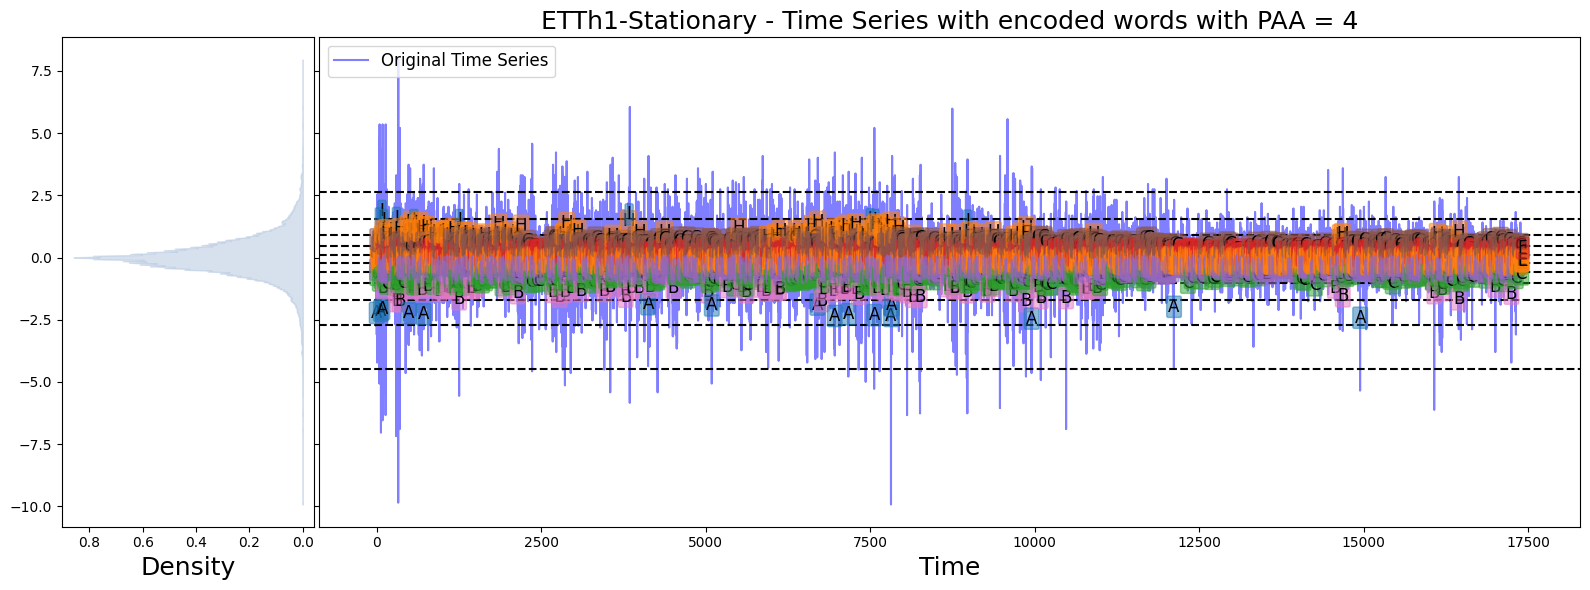

In [21]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="ETT-Small/ETTh1_stationary_ksax.png", data_name='ETTh1-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth1.index[0]), csv_path=DATA_DIR+"ETT-Small/ETTh1_stationary_ksax.csv")